# Trying Face Detection using this tutorial




Haar-cascade Detection in OpenCV
OpenCV comes with a trainer as well as detector. If you want to train your own classifier for any object like car, planes etc. you can use OpenCV to create one. Its full details are given here: Cascade Classifier Training.




In [10]:
%matplotlib inline 
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)



Populating the interactive namespace from numpy and matplotlib


/Users/pabloelustondo/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


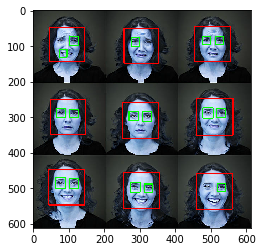

In [12]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(img)
plt.show()

# Training the model
https://docs.opencv.org/2.4/doc/user_guide/ug_traincascade.html


# Summary 
The work with a cascade classifier includes two major stages: training and detection. 

Training:

we need to various classifier, one for each type og object to detect.
for each type of object we need to craete positive and negative images.

opencv_createsamples is used to prepare a training dataset of positive and test samples. opencv_createsamples produces dataset of positive samples in a format that is supported by both opencv_haartraining and opencv_traincascade applications. The output is a file with *.vec extension, it is a binary format which contains images.

Training data preparation¶
For training we need a set of samples. There are two types of samples: negative and positive. Negative samples correspond to non-object images. Positive samples correspond to images with detected objects. Set of negative samples must be prepared manually, whereas set of positive samples is created using opencv_createsamples utility.

Positive samples are created by opencv_createsamples utility. They may be created from a single image with object or from a collection of previously marked up images.


Positive samples are created by opencv_createsamples utility. They may be created from a single image with object or from a collection of previously marked up images.

Please note that you need a large dataset of positive samples before you give it to the mentioned utility, because it only applies perspective transformation. For example you may need only one positive sample for absolutely rigid object like an OpenCV logo, but you definitely need hundreds and even thousands of positive samples for faces. In the case of faces you should consider all the race and age groups, emotions and perhaps beard styles.

So, a single object image may contain a company logo. Then a large set of positive samples is created from the given object image by random rotating, changing the logo intensity as well as placing the logo on arbitrary background. The amount and range of randomness can be controlled by command line arguments of opencv_createsamples utility.

In [ ]:
# finally the training

Cascade Training¶
The next step is the training of classifier. 
As mentioned above opencv_traincascade or 
opencv_haartraining may be used to train a cascade classifier, 
but only the newer opencv_traincascade will be described further.


opencv_traincascade -data delete_button_mode'  -w 136 -h 116 -vec annotations.lst  -bg neg/bt.txt -numPos 2 -numNeg 2 

Where the trained classifier should be stored.


vec-file with positive samples (created by opencv_createsamples utility).
-bg <background_file_name>  -w 136 -h 116

Background description file.
